## Партнерская витрина - это набор предложений партнеров банка, которые предоставляют различного рода скидки нашим клиентам.

На витрину можно перейти разными способами: через внешние и внутренние коммуникации 
- SMS
- email
- push
- баннеры/уведомления внутри приложения

Партнеры могут предоставлять данные о совершенных нашими клиентами конверсиях
(транзакциях).  

1. Какие наборы метрик для оценки эффективности партнерской витрины вы можете предложить?  
2. Какие из них рекомендуете выбрать как основные, чтобы дать оценку этому продукту? И почему?  
3. Разметка каких событий вам понадобится?  
4. Какую информацию необходимо передавать в событиях?  
5. Какие гипотезы мы можем проверить, чтобы улучшить наши основные показатели?  

### 1. Какие наборы метрик для оценки эффективности партнерской витрины вы можете предложить? 
- **Visit Сonversion Rate**  
    Конверсия переходов с различных источников на страницу витрины
- **Converting views to transactions rate**  
    Конверсия просмотров предложений партнеров в совершенные транзакции
- **Average Order**  
    Средний чек совершенных транзакций через партнерскую витрину
- **Retention**  
    Коэффициент удержания клиентов, совершивших транзакции через партнерскую витрину
    
**Если говорить о более сложных метриках:**
- **Average cashback per offer**  
    Средний кэшбек по предложению
- **Average cashback per user**  
    Средний кэшбек на человека

### 2. Какие из них рекомендуете выбрать как основные, чтобы дать оценку этому продукту? И почему? 
- **Visit Сonversion Rate**  
    Конверсия переходов с различных источников на страницу витрины
- **Converting views to transactions rate**  
    Конверсия просмотров предложений партнеров в совершенные транзакции  

**Эти метрики напрямую позволят оценить эффективность работы партнеров, и понять, какие каналы коммуникации и предложения наиболее привлекательны для клиентов.**

### 3 / 4. Разметка каких событий вам понадобится? 
**1. Идентификатор клиента или устройства.**  
   - Сопоставление событий с конкретными пользователями и проведение анализа поведения клиентов на основе их активности.  
   
**2. Тип события.**  
Для отслеживания действий пользователя:
- переход на страницу витрины  
- просмотр предложения
- совершение транзакции  
   
**3. Дата и время события.**  
   - Для отслеживания временных тенденций и выявления пиков активности пользователей.  
    
**4. Источник перехода на витрину**  
- Для оценки по какому каналу коммуникации предложения наиболее привлекательны для клиентов


### 5. Какие гипотезы мы можем проверить, чтобы улучшить наши основные показатели? 
- Оптимизация текста и дизайна коммуникаций для увеличения конверсии переходов на страницу витрины.
- Тестирование различных предложений партнеров для определения наиболее привлекательных для клиентов.
- Анализ эффективности различных каналов коммуникации и перераспределение бюджета в пользу наиболее эффективных источников трафика.
- Использование персонализированных предложений на основе истории транзакций клиента для увеличения конверсии и среднего чека.

**Данные:** активность клиентов с сентября 2021 года по февраль 2022.  
Необходимо на основе этих данных провести когортный анализ.
Описание полей:
- CLIENT_ID - идентификатор клиента;
- VALUE_DAY - дата авторизации в мобильное приложение за последние 30 дней   

#### 1. Постройте визуальные представление которые могут помочь вам оценить поведение и удержание клиентов
#### 2. Какие гипотезы такого поведения можно предположить? Как их можно проверить? 
#### 3. Какими способами можно улучшить ситуацию?  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action="ignore", category=Warning)
%matplotlib inline

In [2]:
df = pd.read_csv("dataset.csv", sep=";")
df.head()

,Unnamed: 0,CLIENT_ID,VALUE_DAY
0,0,3596869440,30.09.2021
1,1,181778433,30.09.2021
2,2,4271531990,30.09.2021
3,3,3949165697,30.09.2021
4,4,1926920317,30.09.2021


In [3]:
df = df[["CLIENT_ID", "VALUE_DAY"]]
df.head()

,CLIENT_ID,VALUE_DAY
0,3596869440,30.09.2021
1,181778433,30.09.2021
2,4271531990,30.09.2021
3,3949165697,30.09.2021
4,1926920317,30.09.2021


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805821 entries, 0 to 805820
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   CLIENT_ID  805821 non-null  int64 
 1   VALUE_DAY  805821 non-null  object
dtypes: int64(1), object(1)
memory usage: 12.3+ MB


In [5]:
# Преобразование дат в формат даты
df['VALUE_DAY'] = pd.to_datetime(df['VALUE_DAY'], format='%d.%m.%Y')

# Извлечение месяца первого посещения
df['FirstVisitMonth'] = df['VALUE_DAY'].dt.to_period('M')
df.head()

,CLIENT_ID,VALUE_DAY,FirstVisitMonth
0,3596869440,2021-09-30,2021-09
1,181778433,2021-09-30,2021-09
2,4271531990,2021-09-30,2021-09
3,3949165697,2021-09-30,2021-09
4,1926920317,2021-09-30,2021-09


## 1.1 Построение графика ежемесячной активности

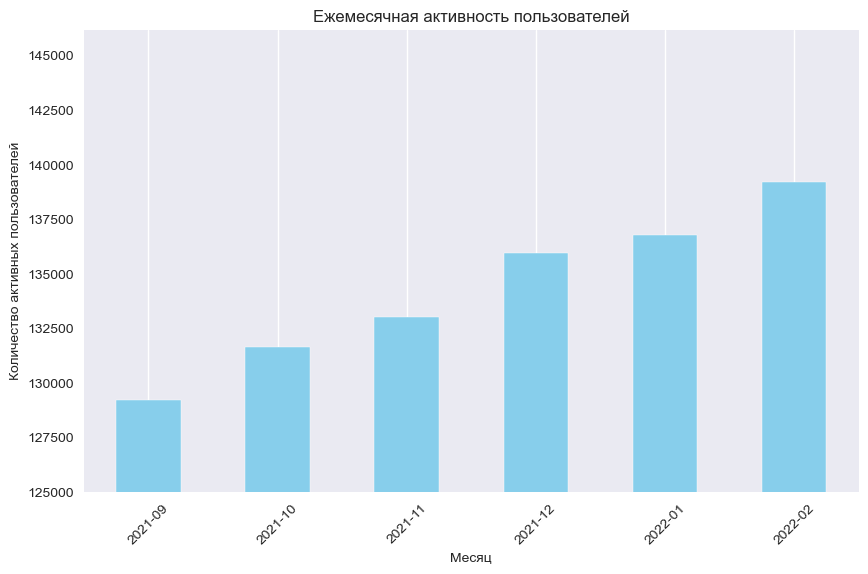

In [14]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))
df['VALUE_DAY'].dt.to_period('M').value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Ежемесячная активность пользователей')
plt.xlabel('Месяц')
plt.ylabel('Количество активных пользователей')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.ylim(125_000)
plt.show()

## 1.2 Построение когортного анализа удержания пользователей

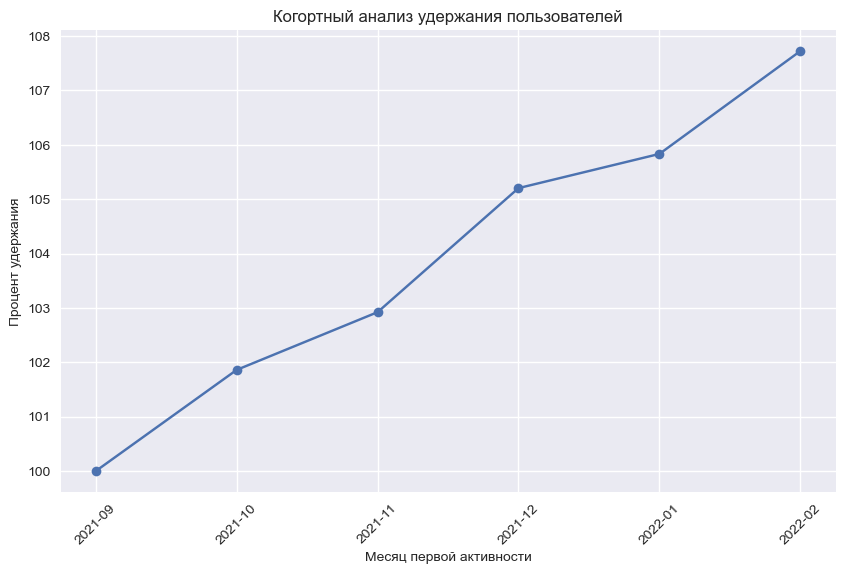

In [18]:
# Группируем данные по когортам и считаем количество уникальных пользователей
cohort_data = df.groupby('FirstVisitMonth')['CLIENT_ID'].nunique().reset_index()

cohort_data['Retention'] = cohort_data['CLIENT_ID'] / cohort_data['CLIENT_ID'].iloc[0] * 100
cohort_data['FirstVisitMonth'] = cohort_data['FirstVisitMonth'].astype(str)

plt.figure(figsize=(10, 6))
plt.plot(cohort_data['FirstVisitMonth'], cohort_data['Retention'], marker='o')
plt.title('Когортный анализ удержания пользователей')
plt.xlabel('Месяц первой активности')
plt.ylabel('Процент удержания')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

## 1.3 Построение графика распределения продолжительности сессий

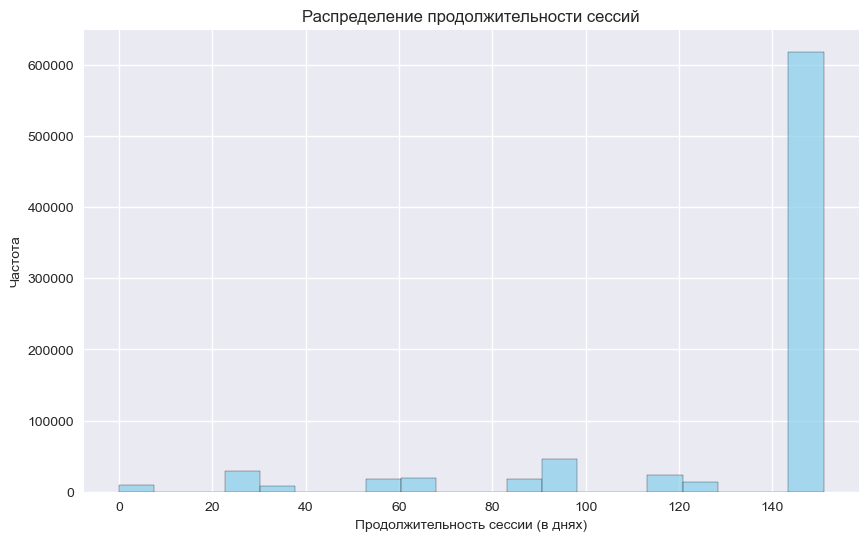

In [16]:
df['SessionDuration'] = df.groupby('CLIENT_ID')['VALUE_DAY'].transform(lambda x: (x.max() - x.min()).days)

plt.figure(figsize=(10, 6))
plt.hist(df['SessionDuration'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение продолжительности сессий')
plt.xlabel('Продолжительность сессии (в днях)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

## Вывод:
### Удержание клиентов улучшается с течением времени и количество уникальных пользователей растет каждый месяц, это хороший сигнал о стабильности и росте приложения

### 2. Гипотезы Какие гипотезы такого поведения можно предположить? Как их можно проверить?

#### 2.1. Улучшение вовлеченности пользователей
- Пользователи могут быть зарегистрированы в приложении, но не активно использовать его. 
- Гипотеза: увеличение вовлеченности пользователей приведет к улучшению удержания.  

**Вариант проверки:** анализ метрик вовлеченности, такие как количество сеансов, время нахождения в приложении и активность на страницах.

#### 2.2. Повышение конверсии в ключевые действия 
- Если пользователи посещают приложение, но не выполняют ключевые действия, такие как оформление покупки или регистрация, это может быть проблемой. 
- Гипотеза: улучшение конверсии в ключевые действия повысит общее удержание.  

**Вариант проверки:** анализ воронки конверсии и идентифицирование узких мест.

#### 2.3. Поддержка и взаимодействие с клиентами
- Усиление взаимодействия с клиентами, такое как персонализированные уведомления, предложения и поддержка, может способствовать удержанию. 
- Гипотеза: активное взаимодействие с клиентами увеличит их лояльность.  

**Вариант проверки:** анализ данных об уровне удовлетворенности клиентов и обратной связи.

### 3. Способы улучшения ситуации

#### 3.1. Оптимизация пользовательского интерфейса:  
- Улучшение навигации, дизайна и функциональности приложения сделает его более привлекательным для пользователей и повысит вероятность их удержания.

#### 3.2. Персонализированные предложения и рекомендации

#### 3.3. Усиление маркетинга:  
   - Улучшение маркетинговых кампаний, акций поможет привлечь новых пользователей и удержать существующих.

#### 3.4. Постоянное изучение и анализ данных:  
   - Регулярное анализирование данных и метрик поможет идентифицировать тенденции и проблемы, а также определить наиболее эффективные стратегии улучшения ситуации.

#### 3.5. Эксперименты и тестирование:  
   - Проведение экспериментов и A/B-тестирование различных изменений в приложении поможет определить наилучшие практики и стратегии для улучшения удержания клиентов.

In [17]:
#!ruff format ~/jupiter_notebook/Affiliate_showcase.ipynb